# Import things

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(42)

# Load data

In [2]:
red_wine = pd.read_csv("./resources/resources/winequality-red.csv", sep=';')

# V.1 Exploring the green reds

In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## a)

In [4]:
def plot_scatter_matrix(wine_data, good_threshhold, bad_threshold, save_plot=False):
    """Visualizes the data
    """
    fig, ax = plt.subplots(len(wine_data.columns), len(wine_data.columns), figsize=(50, 50))
    bigger = wine_data.where(wine_data['quality'] > good_threshhold)
    smaller = wine_data.where(wine_data['quality'] < bad_threshold)
    for i in range(len(wine_data.columns)):
        for j in range(len(wine_data.columns)):
            if i == j:
                ax[(i, j)].text(0.5, 0.5, wine_data.columns[i], fontsize=15, \
                                ha='center', va='center', wrap=True, withdash=True)
            else:
                ax[(j, i)].plot(bigger.iloc[:, i], bigger.iloc[:, j], 'co')
                ax[(j, i)].plot(smaller.iloc[:, i], smaller.iloc[:, j], 'mo')
    if save_plot:
        plt.savefig('scatter_matrix.png')
# plot_scatter_matrix(red_wine, 6, 5)

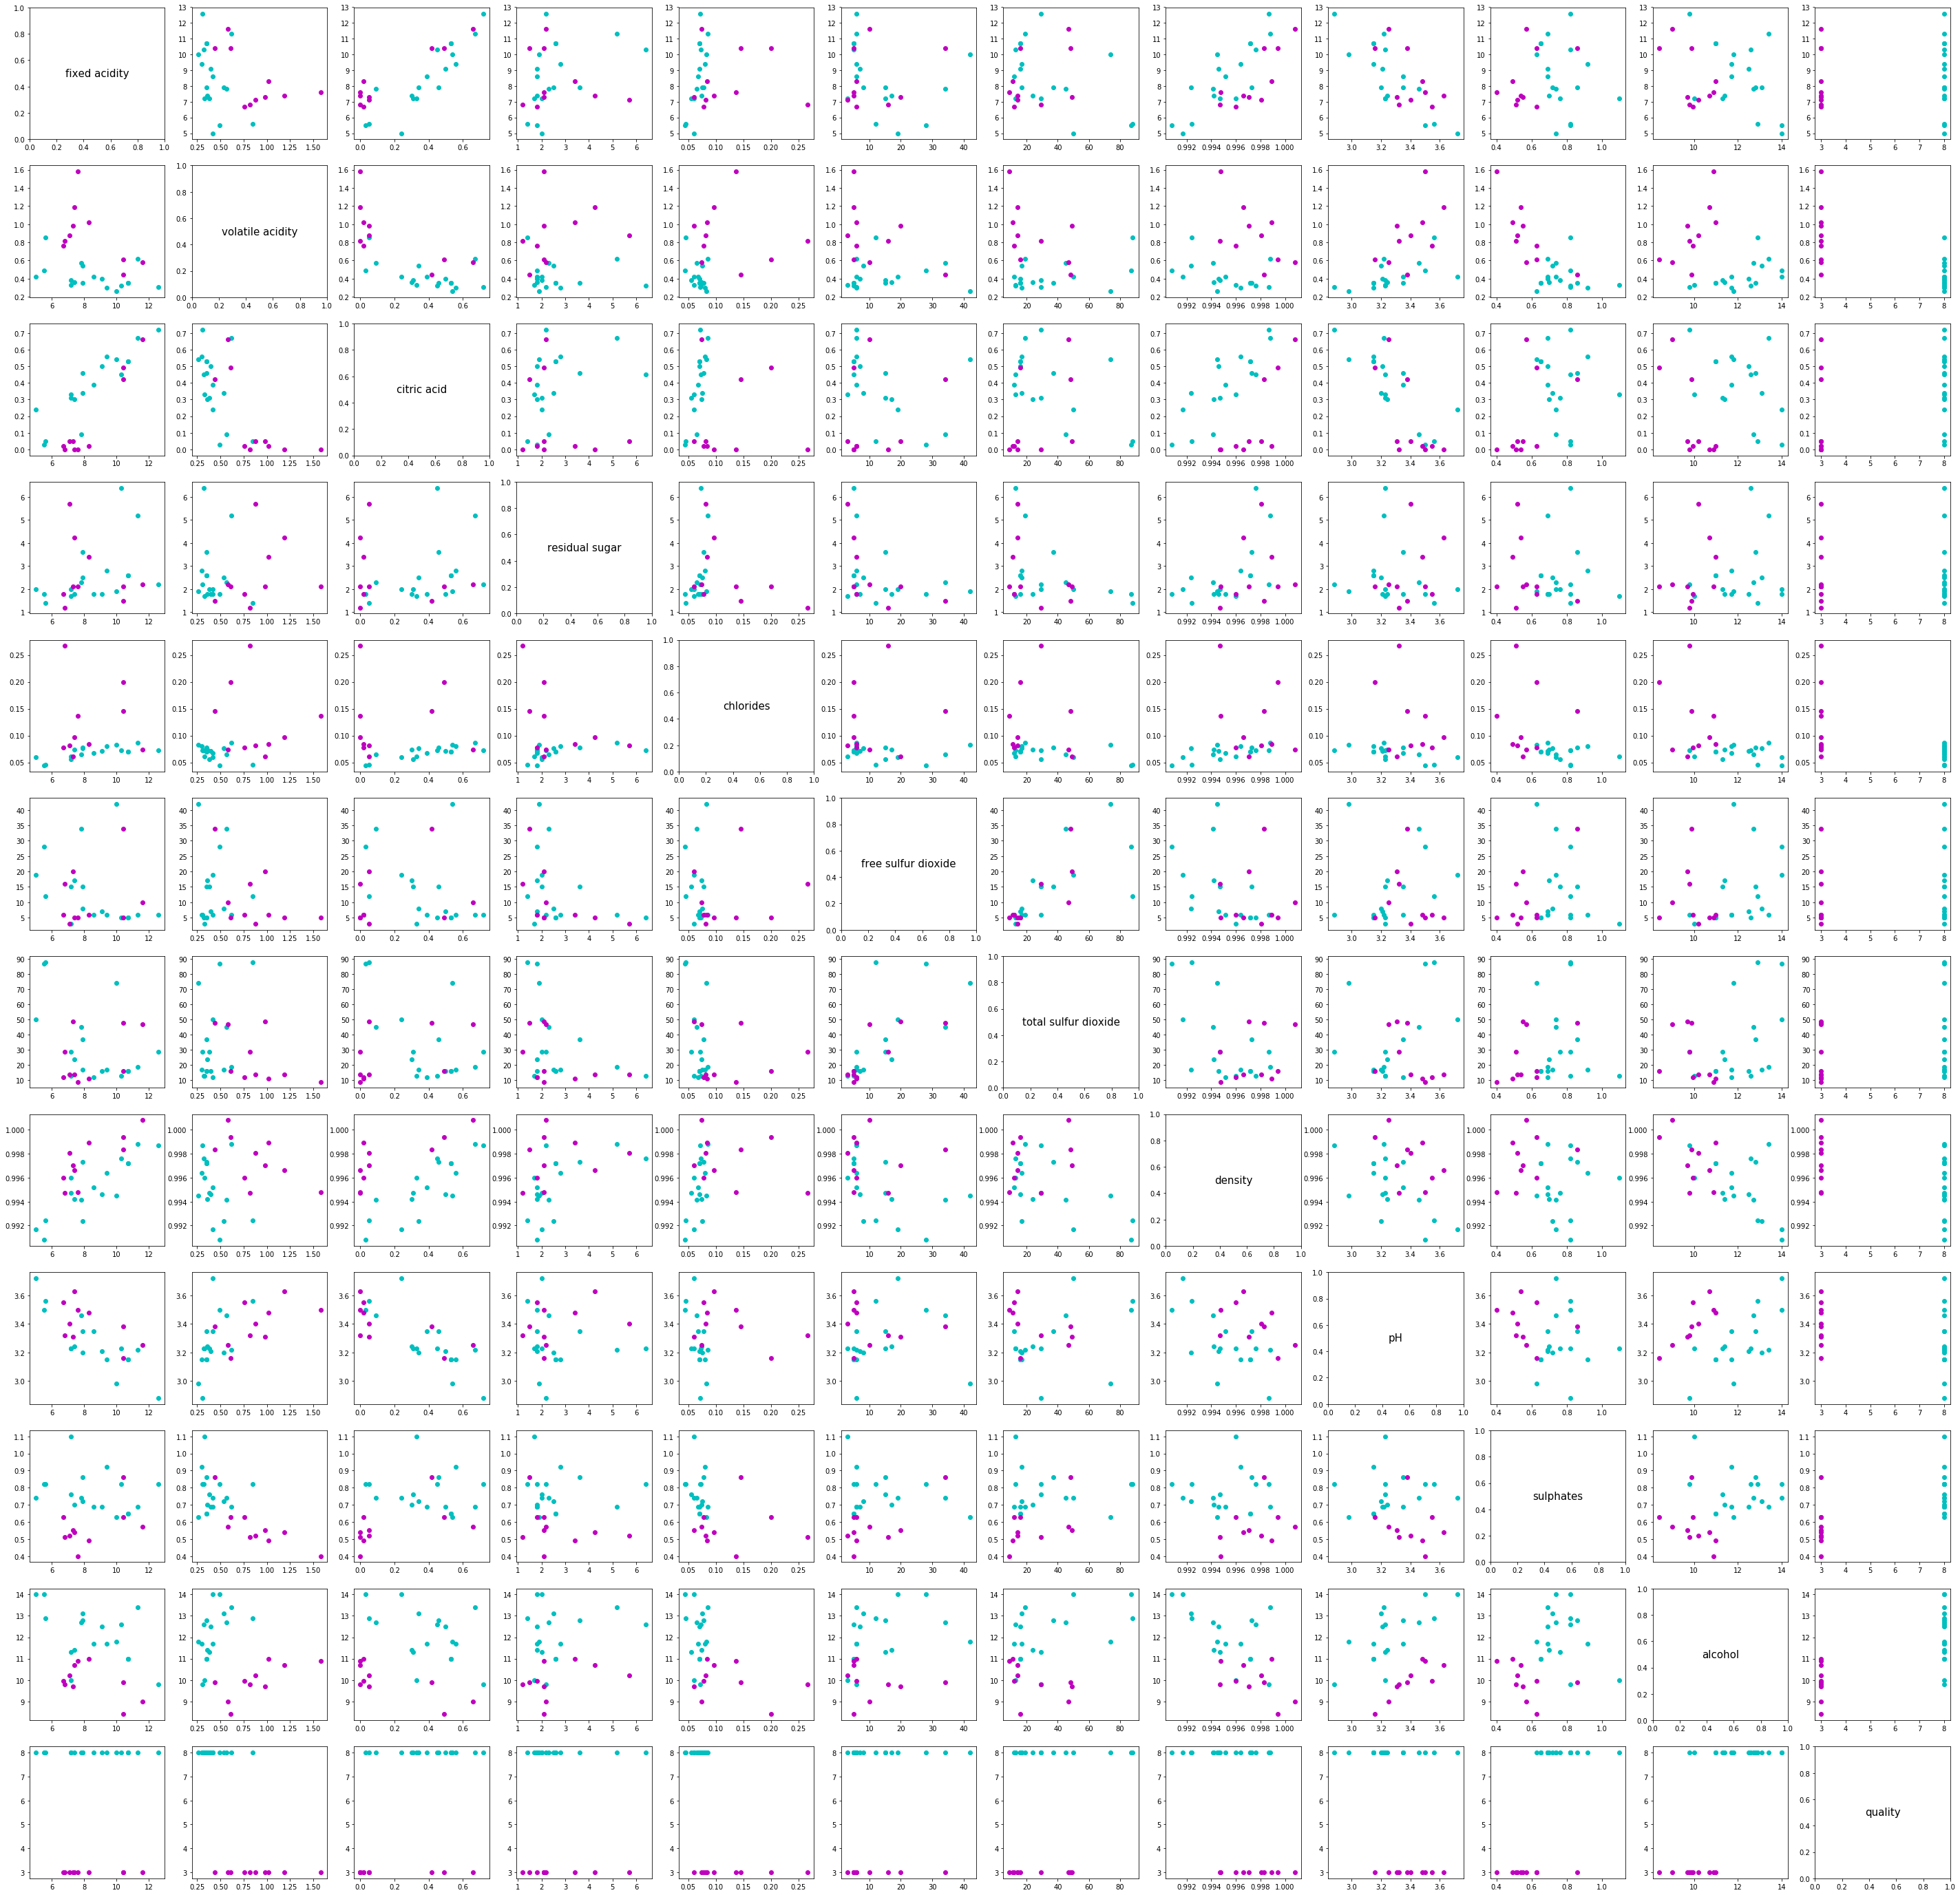

In [5]:
plot_scatter_matrix(red_wine, 7, 4)

## b)

I think it can be pH, sulphates, alcohol and total sulfur dioxide. Cause there
different
groups of wine(based on quality) r better splitted.

# V.2 Learning to
perceptron

In [6]:
class perceptron:
    """A simple perceptron, with randomly initialized weights and bias"""

    def __init__(self, amount):
        """Random data initialization"""
        self.amount = amount
        self.weights = [random.random() for n in range(amount)]
        self.bias = random.random()

    def activation(self, value):
        """Activation function"""
        return 1 if value > 0 else 0

    def predict(self, data, alpha, y = None):
        """Predicts answer and updates weights to fit the data item better
        Returns predicted value or whether he guessed right
        """
#         print(y)
        rez = self.activation(sum([data[i] * self.weights[i] for i in range(self.amount)]))
        if y == None:
            return rez
#         print(rez, y)
        if rez != y:
#             print('potato')
            self.weights = [self.weights[i] + alpha * data[i] * (y - rez) for i in range(self.amount)]
#             self.bias += alpha * 0.01 if y == 0 else - alpha * 0.01
        return rez != y

    def train(self, data, y, epochs = 0, alpha = 0.001):
        """Trains perceptron epoch times, and logs results"""
        ret = []
        errors = 1
#         print(data, y)
        if epochs == 0:
            i = 0
            while (errors):
                errors = 0
                for item in data.itertuples():
                    errors += self.predict(item[1:], alpha, y[item[0]])
                ret.append([i, errors, self.weights, self.bias])
                i += 1
                if (i % 100) == 0:
                    print('.', end='')
                if (i % 10000) == 0:
                    print()
                    print('errors = ', errors)
                    print('data = ', ret[-1])
#                 print(ret[-1])
        else:
            for i in range(epochs):
                errors = 0
                for item in data.itertuples():
#                     print(y[item[0]])
                    errors += self.predict(item[1:], alpha, y[item[0]])
                ret.append([i, errors, self.weights, self.bias])
        return ret

In [83]:
def plot_performance(performance, wine_data, good_threshold, bad_threshold, epoch=-1, save_plot=False):
    """Plot the performance of my perceptron"""
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    bigger = wine_data.where(wine_data['quality'] > good_threshold)
    smaller = wine_data.where(wine_data['quality'] < bad_threshold)
    ax[0].plot([i[1] for i in performance])
    ax[0].set_title('Errors as a function of epoch')
    ax[0].set_xlabel('Classification errors')
    ax[0].set_ylabel('Epoch')
    ax[1].plot(bigger.loc[:, 'pH'], bigger.loc[:, 'alcohol'], 'mo', label = 'good wines (> ' + str(good_threshold) + ' score)')
    ax[1].plot(smaller.loc[:, 'pH'], smaller.loc[:, 'alcohol'], 'co', label = 'bad wines (< ' + str(bad_threshold) + ' score)')
    ax[1].set_title('Decision boundary on epoch:' + str(len(performance) if epoch == -1 else epoch))
    ax[1].set_xlabel('pH')
    ax[1].set_ylabel('Alcohol')
    val = performance[epoch][2][0] / performance[epoch][2][1]
    ax[1].plot([min(wine_data['pH']), max(wine_data['pH'])], [- min(wine_data['pH']) * val, - max(wine_data['pH']) * val], 'g-')
    plt.tight_layout()

In [38]:
model = perceptron(2)
data = red_wine[(red_wine['quality'] >= 8) | (red_wine['quality'] <= 3)].reset_index()
y = [1 if i == True else 0 for i in data['quality'] >= 8]
logs = model.train(data[['pH', 'alcohol']], y, 0, 0.000000001)

....................................................................................................
errors =  10
data =  [9999, 10, [0.02619616968388566, 0.1978421506867145], 0.6498844377795232]
....................................................................................................
errors =  10
data =  [19999, 10, [0.0258563696839077, 0.19684665068678053], 0.6498844377795232]
....................................................................................................
errors =  10
data =  [29999, 10, [0.025516569683929735, 0.19585115068684655], 0.6498844377795232]
....................................................................................................
errors =  10
data =  [39999, 10, [0.025176769683951772, 0.19485565068691257], 0.6498844377795232]
....................................................................................................
errors =  10
data =  [49999, 10, [0.02483696968397381, 0.1938601506869786], 0.6498844377795232]
............

....................................................................................................
errors =  10
data =  [419999, 10, [0.012264369684446037, 0.15702665068942134], 0.6498844377795232]
....................................................................................................
errors =  10
data =  [429999, 10, [0.01192456968443338, 0.15603115068948736], 0.6498844377795232]
....................................................................................................
errors =  10
data =  [439999, 10, [0.011584769684420721, 0.15503565068955338], 0.6498844377795232]
....................................................................................................
errors =  10
data =  [449999, 10, [0.011244969684408064, 0.1540401506896194], 0.6498844377795232]
....................................................................................................
errors =  10
data =  [459999, 10, [0.010905169684395406, 0.15304465068968542], 0.6498844377795232]
..

....................................................................................................
errors =  10
data =  [829999, 10, [-0.0016674303157268532, 0.11621115069212817], 0.6498844377795232]
....................................................................................................
errors =  10
data =  [839999, 10, [-0.002007230315723987, 0.1152156506921942], 0.6498844377795232]
....................................................................................................
errors =  10
data =  [849999, 10, [-0.0023470303157192974, 0.11422015069226021], 0.6498844377795232]
....................................................................................................
errors =  10
data =  [859999, 10, [-0.002686830315714608, 0.11322465069232623], 0.6498844377795232]
....................................................................................................
errors =  10
data =  [869999, 10, [-0.0030266303157099185, 0.11222915069239225], 0.64988443777

....................................................................................................
errors =  10
data =  [1239999, 10, [-0.01559923031603364, 0.075395650694835], 0.6498844377795232]
....................................................................................................
errors =  10
data =  [1249999, 10, [-0.015939030316014235, 0.07440015069490102], 0.6498844377795232]
....................................................................................................
errors =  10
data =  [1259999, 10, [-0.0162788303159922, 0.07340465069496704], 0.6498844377795232]
....................................................................................................
errors =  10
data =  [1269999, 10, [-0.016618630315970162, 0.07240915069503306], 0.6498844377795232]
....................................................................................................
errors =  10
data =  [1279999, 10, [-0.016958430315948125, 0.07141365069509908], 0.6498844377795

....................................................................................................
errors =  10
data =  [1649999, 10, [-0.029531030315132767, 0.03458015069754184], 0.6498844377795232]
....................................................................................................
errors =  10
data =  [1659999, 10, [-0.02987083031511073, 0.03358465069760786], 0.6498844377795232]
....................................................................................................
errors =  10
data =  [1669999, 10, [-0.030210630315088693, 0.03258915069767388], 0.6498844377795232]
....................................................................................................
errors =  10
data =  [1679999, 10, [-0.030550430315066657, 0.0315936506977399], 0.6498844377795232]
....................................................................................................
errors =  10
data =  [1689999, 10, [-0.03089023031504462, 0.030598150697737768], 0.6498844377

....................................................................................................
errors =  2
data =  [2059999, 2, [-0.03727249965638554, 0.011797322347310775], 0.6498844377795232]
....................................................................................................
errors =  1
data =  [2069999, 1, [-0.03727352065645215, 0.01179199734731579], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [2079999, 2, [-0.03727291997651715, 0.011791798347320531], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [2089999, 2, [-0.037272315816582156, 0.011791610347325272], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [2099999, 2, [-0.03727171165664716, 0.011791422347330013], 0.6498844377795232]


....................................................................................................
errors =  2
data =  [2469999, 2, [-0.0372493925390523, 0.011784356347505439], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [2479999, 2, [-0.037248788379117305, 0.01178416834751018], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [2489999, 2, [-0.03724818421918231, 0.01178398034751492], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [2499999, 2, [-0.037247583539247314, 0.011783781347519662], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [2509999, 2, [-0.03724697937931232, 0.011783593347524404], 0.6498844377795232]
.

....................................................................................................
errors =  1
data =  [2879999, 1, [-0.037224656781717456, 0.011776538347699829], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [2889999, 2, [-0.03722405610178246, 0.01177633934770457], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [2899999, 2, [-0.037223451941847466, 0.011776151347709311], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [2909999, 2, [-0.03722284778191247, 0.011775963347714052], 0.6498844377795232]
....................................................................................................
errors =  1
data =  [2919999, 1, [-0.03722224362197747, 0.011775775347718793], 0.6498844377795232]

....................................................................................................
errors =  2
data =  [3289999, 2, [-0.037199924504382614, 0.011768709347894219], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [3299999, 2, [-0.03719932034444762, 0.01176852134789896], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [3309999, 2, [-0.037198719664512624, 0.011768322347903702], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [3319999, 2, [-0.03719811550457763, 0.011768134347908443], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [3329999, 2, [-0.03719751134464263, 0.011767946347913184], 0.6498844377795232]

....................................................................................................
errors =  2
data =  [3699999, 2, [-0.03717519222704777, 0.01176088034808861], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [3709999, 2, [-0.037174588067112775, 0.01176069234809335], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [3719999, 2, [-0.03717398390717778, 0.011760504348098092], 0.6498844377795232]
....................................................................................................
errors =  1
data =  [3729999, 1, [-0.03717337974724278, 0.011760316348102833], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [3739999, 2, [-0.03717277906730779, 0.011760117348107575], 0.6498844377795232]
.

....................................................................................................
errors =  2
data =  [4109999, 2, [-0.03715045646971293, 0.011753062348283], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [4119999, 2, [-0.03714985578977793, 0.011752863348287741], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [4129999, 2, [-0.037149251629842936, 0.011752675348292482], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [4139999, 2, [-0.03714864746990794, 0.011752487348297223], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [4149999, 2, [-0.03714804330997294, 0.011752299348301964], 0.6498844377795232]
..

....................................................................................................
errors =  2
data =  [4519999, 2, [-0.037125724192378085, 0.01174523334847739], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [4529999, 2, [-0.03712512003244309, 0.011745045348482131], 0.6498844377795232]
....................................................................................................
errors =  1
data =  [4539999, 1, [-0.03712451587250809, 0.011744857348486872], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [4549999, 2, [-0.0371239151925731, 0.011744658348491614], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [4559999, 2, [-0.0371233110326381, 0.011744470348496355], 0.6498844377795232]
..

....................................................................................................
errors =  2
data =  [4929999, 2, [-0.03710099191504324, 0.01173740434867178], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [4939999, 2, [-0.037100387755108245, 0.011737216348676522], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [4949999, 2, [-0.03709978359517325, 0.011737028348681263], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [4959999, 2, [-0.03709917943523825, 0.011736840348686004], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [4969999, 2, [-0.03709857875530326, 0.011736641348690745], 0.6498844377795232]


....................................................................................................
errors =  2
data =  [5339999, 2, [-0.0370762561577084, 0.01172958634886617], 0.6498844377795232]
....................................................................................................
errors =  1
data =  [5349999, 1, [-0.0370756519977734, 0.011729398348870912], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [5359999, 2, [-0.037075051317838406, 0.011729199348875653], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [5369999, 2, [-0.03707444715790341, 0.011729011348880394], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [5379999, 2, [-0.03707384299796841, 0.011728823348885135], 0.6498844377795232]
..

....................................................................................................
errors =  2
data =  [5749999, 2, [-0.037051523880373555, 0.011721757349060561], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [5759999, 2, [-0.03705091972043856, 0.011721569349065302], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [5769999, 2, [-0.03705031556050356, 0.011721381349070043], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [5779999, 2, [-0.03704971488056857, 0.011721182349074785], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [5789999, 2, [-0.03704911072063357, 0.011720994349079526], 0.6498844377795232]

....................................................................................................
errors =  1
data =  [6159999, 1, [-0.03702678812303871, 0.011713939349254951], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [6169999, 2, [-0.037026187443103716, 0.011713740349259693], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [6179999, 2, [-0.03702558328316872, 0.011713552349264434], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [6189999, 2, [-0.03702497912323372, 0.011713364349269175], 0.6498844377795232]
....................................................................................................
errors =  1
data =  [6199999, 1, [-0.037024374963298724, 0.011713176349273916], 0.6498844377795232

....................................................................................................
errors =  2
data =  [6569999, 2, [-0.03700205584570387, 0.011706110349449341], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [6579999, 2, [-0.03700145168576887, 0.011705922349454083], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [6589999, 2, [-0.037000851005833876, 0.011705723349458824], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [6599999, 2, [-0.03700024684589888, 0.011705535349463565], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [6609999, 2, [-0.03699964268596388, 0.011705347349468306], 0.6498844377795232]

....................................................................................................
errors =  2
data =  [6979999, 2, [-0.036977323568369025, 0.011698281349643732], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [6989999, 2, [-0.03697671940843403, 0.011698093349648473], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [6999999, 2, [-0.03697611524849903, 0.011697905349653214], 0.6498844377795232]
....................................................................................................
errors =  1
data =  [7009999, 1, [-0.036975511088564034, 0.011697717349657955], 0.6498844377795232]
....................................................................................................
errors =  2
data =  [7019999, 2, [-0.03697491040862904, 0.011697518349662697], 0.6498844377795232

KeyboardInterrupt: 

## d) Feature scaling

In [10]:
model_normalized = perceptron(2)
data = red_wine[(red_wine['quality'] >= 8) | (red_wine['quality'] <= 3)].reset_index()
data.describe()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,906.607143,8.492857,0.588036,0.312500,2.598214,0.087750,12.464286,30.392857,0.996016,3.313929,0.697143,11.330357,6.214286
std,437.621208,1.970886,0.316916,0.239886,1.308270,0.047373,10.553153,22.782936,0.002471,0.190620,0.150526,1.502057,2.439750
min,267.000000,5.000000,0.260000,0.000000,1.200000,0.044000,3.000000,9.000000,0.990800,2.880000,0.400000,8.400000,3.000000
25%,491.500000,7.200000,0.350000,0.050000,1.800000,0.067250,5.000000,14.000000,0.994592,3.207500,0.615000,9.987500,3.000000
50%,865.500000,7.900000,0.465000,0.335000,2.100000,0.074000,6.500000,18.000000,0.996200,3.280000,0.690000,11.150000,8.000000
75%,1317.750000,10.325000,0.773750,0.507500,2.650000,0.083250,16.250000,45.500000,0.997720,3.465000,0.820000,12.625000,8.000000
max,1549.000000,12.600000,1.580000,0.720000,6.400000,0.267000,42.000000,88.000000,1.000800,3.720000,1.100000,14.000000,8.000000


In [11]:
data['pH'] = (data['pH'] - min(data['pH'])) / (max(data['pH']) - min(data['pH']))
data['alcohol'] = (data['alcohol'] - min(data['alcohol'])) / (max(data['alcohol']) - min(data['alcohol']))
y = [1 if i == True else 0 for i in data['quality'] >= 8]
data.describe()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,906.607143,8.492857,0.588036,0.312500,2.598214,0.087750,12.464286,30.392857,0.996016,0.516582,0.697143,0.523278,6.214286
std,437.621208,1.970886,0.316916,0.239886,1.308270,0.047373,10.553153,22.782936,0.002471,0.226928,0.150526,0.268224,2.439750
min,267.000000,5.000000,0.260000,0.000000,1.200000,0.044000,3.000000,9.000000,0.990800,0.000000,0.400000,0.000000,3.000000
25%,491.500000,7.200000,0.350000,0.050000,1.800000,0.067250,5.000000,14.000000,0.994592,0.389881,0.615000,0.283482,3.000000
50%,865.500000,7.900000,0.465000,0.335000,2.100000,0.074000,6.500000,18.000000,0.996200,0.476190,0.690000,0.491071,8.000000
75%,1317.750000,10.325000,0.773750,0.507500,2.650000,0.083250,16.250000,45.500000,0.997720,0.696429,0.820000,0.754464,8.000000
max,1549.000000,12.600000,1.580000,0.720000,6.400000,0.267000,42.000000,88.000000,1.000800,1.000000,1.100000,1.000000,8.000000


In [12]:
print(y)

[1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1]


In [13]:
logs_normalized = model_normalized.train(data[['pH', 'alcohol']], y, 0, 0.000001)

....................................................................................................
errors =  10
data =  [9999, 10, [0.16154407148214067, 0.7087033570203667], 0.6766994874229113]
....................................................................................................
errors =  10
data =  [19999, 10, [0.09987740481545859, 0.680935499876721], 0.6766994874229113]
....................................................................................................
errors =  10
data =  [29999, 10, [0.0382107381487765, 0.6531676427330753], 0.6766994874229113]
....................................................................................................
errors =  9
data =  [39999, 9, [-0.02218826185122086, 0.6253997855894295], 0.6766994874229113]
....................................................................................................
errors =  9
data =  [49999, 9, [-0.08052159518455716, 0.5976319284457838], 0.6766994874229113]
....................

In [ ]:
print(red_wine.columns)

In [ ]:
print((logs.iloc[1] == 10).all())

In [ ]:
print(logs[-1])

In [85]:
print(logs_normalized[-1])

[134219, 0, [-0.3090917499476789, 0.4755246516569428], 0.6766994874229113]


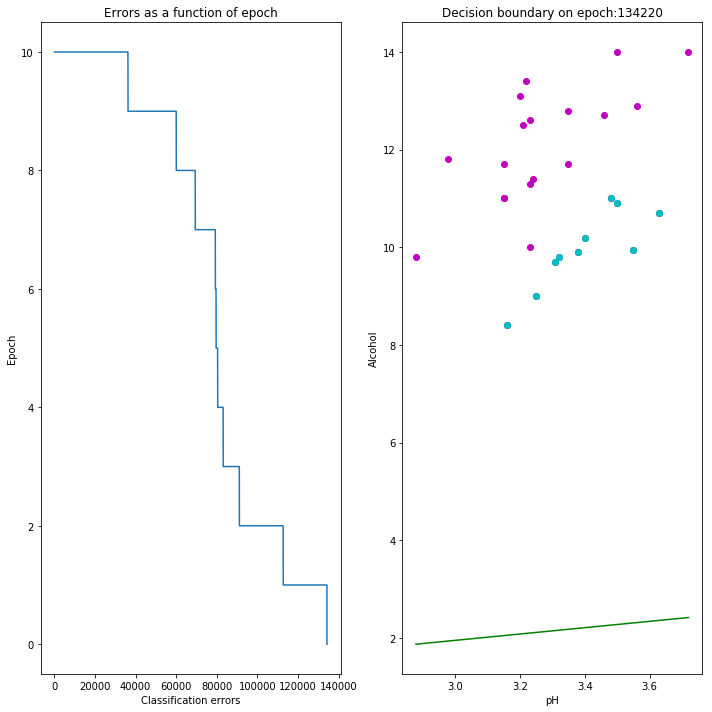

In [84]:
plot_performance(logs_normalized, data, 0, 4)